```
Name: Andrea Fox
Date: April 21, 2021
Assignment: Week 6 Exercises
```

## Assignment 6.1

```
Using section 5.1 in Deep Learning with Python as a guide (listing 5.3 in particular), create a ConvNet model that classifies images in the MNIST digit dataset. Save the model, predictions, metrics, and validation plots in the dsc650/assignments/assignment06/results directory. If you are using JupyterHub, you can include those plots in your Jupyter notebook.
```

In [9]:
#Load libraries
from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical
from pathlib import Path
import os
import matplotlib.pyplot as plt
import numpy as np
from keras import losses
from keras import metrics

In [2]:
#5.1 Instantiating a small convnet
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [3]:
#Looking at the architecture of the convnet 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [4]:
#5.2 - Adding a classifier on top of the convnet
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
#Checking architecture now to see difference
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [21]:
#5.3 - Training the convnet on MNIST Images
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 14s 15ms/step - loss: 0.0151 - accuracy: 0.9955 - val_loss: 0.0156 - val_accuracy: 0.9960
Epoch 2/5
844/844 [==============================] - 12s 15ms/step - loss: 0.0109 - accuracy: 0.9969 - val_loss: 0.0156 - val_accuracy: 0.9957
Epoch 3/5
844/844 [==============================] - 12s 15ms/step - loss: 0.0082 - accuracy: 0.9976 - val_loss: 0.0218 - val_accuracy: 0.9940
Epoch 4/5
844/844 [==============================] - 12s 14ms/step - loss: 0.0079 - accuracy: 0.9975 - val_loss: 0.0202 - val_accuracy: 0.9958
Epoch 5/5
844/844 [==============================] - 12s 14ms/step - loss: 0.0060 - accuracy: 0.9982 - val_loss: 0.0256 - val_accuracy: 0.9950


In [24]:
#Evaluating model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Accuracy:',test_acc)
print('Test Loss:', test_loss)

313/313 [==============================] - 1s 5ms/step - loss: 0.0354 - accuracy: 0.9929
Test Accuracy: 0.992900013923645
Test Loss: 0.035402439534664154


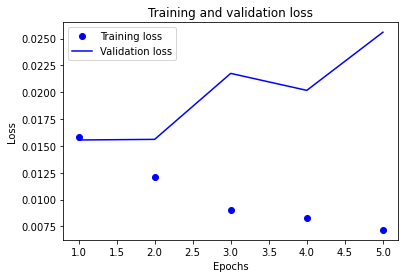

In [29]:
#Create plots
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
val_loss = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(accuracy) + 1)

#Plot for loss
plt.plot(epochs, val_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

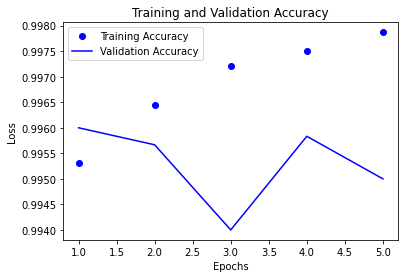

In [28]:
#Plot for Accuracy
plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Assignment 6.2

```
Assignment 6.2.a
Using section 5.2 in Deep Learning with Python as a guide, create a ConvNet model that classifies images CIFAR10 small images classification dataset. Do not use dropout or data-augmentation in this part. Save the model, predictions, metrics, and validation plots in the dsc650/assignments/assignment06/results directory. If you are using JupyterHub, you can include those plots in your Jupyter notebook.
```

In [49]:
#load libraries
from keras import layers
from keras import models
from keras import optimizers
from keras.datasets import cifar10
from matplotlib import pyplot
from keras.utils import to_categorical
from pathlib import Path
import os
import matplotlib.pyplot as plt
import numpy as np
from keras import losses
from keras import metrics

In [39]:
#5.5 - Instantiating a small convnet for classification
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))

In [40]:
#Looking at the architecture of the convnet 
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 4, 4, 128)         73856     
Total params: 93,248
Trainable params: 93,248
Non-trainable params: 0
_________________________________________________________________


In [43]:
#Add classifier to convnet
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

In [44]:
#Second look at architecture to see difference
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten_4 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)              

In [45]:
#Training the convnet on cifar10 Images
(train_images2, train_labels2), (test_images2, test_labels2) = cifar10.load_data()

#Found this on general chat from Sam Loyd
train_images2 = train_images2.reshape((50000, 32, 32, 3))
test_images2 = test_images2.reshape((10000, 32, 32, 3))

train_labels2 = to_categorical(train_labels2)
test_labels2 = to_categorical(test_labels2)

In [46]:
#5.6 - configuring the model for training. Also worked with Anna Harvey on this portion
model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history2 = model2.fit(train_images2, train_labels2, epochs=20, batch_size=64, validation_data=(test_images2, test_labels2))

Epoch 1/20
782/782 [==============================] - 27s 33ms/step - loss: 5.9022 - accuracy: 0.2415 - val_loss: 1.5796 - val_accuracy: 0.4406
Epoch 2/20
782/782 [==============================] - 26s 33ms/step - loss: 1.3356 - accuracy: 0.5381 - val_loss: 1.4188 - val_accuracy: 0.5440
Epoch 3/20
782/782 [==============================] - 25s 32ms/step - loss: 1.1501 - accuracy: 0.6117 - val_loss: 1.2844 - val_accuracy: 0.5851
Epoch 4/20
782/782 [==============================] - 25s 31ms/step - loss: 1.0808 - accuracy: 0.6366 - val_loss: 1.4950 - val_accuracy: 0.6158
Epoch 5/20
782/782 [==============================] - 24s 31ms/step - loss: 1.0598 - accuracy: 0.6515 - val_loss: 1.2030 - val_accuracy: 0.5845
Epoch 6/20
782/782 [==============================] - 23s 30ms/step - loss: 1.0304 - accuracy: 0.6588 - val_loss: 1.1846 - val_accuracy: 0.6151
Epoch 7/20
782/782 [==============================] - 24s 30ms/step - loss: 1.0089 - accuracy: 0.6719 - val_loss: 1.3406 - val_accuracy:

In [72]:
#Evaluating model on test data
test_loss2, test_acc2 = model2.evaluate(test_images2, test_labels2)
print('Test Accuracy:',test_acc2)
print('Test Loss:', test_loss2)

313/313 [==============================] - 2s 7ms/step - loss: 1.2201 - accuracy: 0.6252
Test Accuracy: 0.6251999735832214
Test Loss: 1.2201370000839233


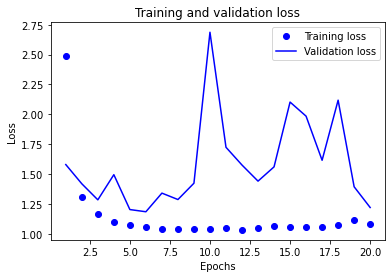

In [52]:
#Create plots
history_dict2 = history2.history
acc_values2 = history_dict2['accuracy']
val_acc_values2 = history_dict2['val_accuracy']
val_loss2 = history_dict2['loss']
val_loss_values2 = history_dict2['val_loss']

epochs2 = range(1, len(val_loss2) + 1)

#Plot for loss
plt.plot(epochs2, val_loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss_values2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

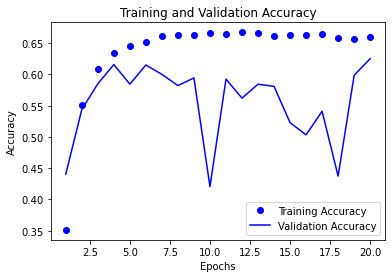

In [54]:
#Plot for Accuracy
plt.plot(epochs2, acc_values2, 'bo', label='Training Accuracy')
plt.plot(epochs2, val_acc_values2, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

```
Assignment 6.2.b
Using section 5.2 in Deep Learning with Python as a guide, create a ConvNet model that classifies images CIFAR10 small images classification dataset. This time includes dropout and data-augmentation. Save the model, predictions, metrics, and validation plots in the dsc650/assignments/assignment06/results directory. If you are using JupyterHub, you can include those plots in your Jupyter notebook.
```

In [76]:
#load libraries
from keras import layers
from keras import models
from keras import optimizers
from keras.datasets import cifar10
from matplotlib import pyplot
from keras.utils import to_categorical
from pathlib import Path
import os
import matplotlib.pyplot as plt
import numpy as np
from keras import losses
from keras import metrics
from keras.preprocessing.image import ImageDataGenerator

In [70]:
#Instantiating convnet for classification
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Dropout(0.2))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Dropout(0.2))
model3.add(layers.Conv2D(128, (3, 3), activation='relu'))

In [71]:
#look at architecture
model3.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 4, 4, 128)       

In [73]:
#Add classifier to convnet
model3.add(layers.Flatten())
model3.add(layers.Dense(512, activation='relu'))
model3.add(layers.Dense(10, activation='softmax'))

In [74]:
#See updated architecture
model3.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 4, 4, 128)       

In [89]:
#Training the convnet on cifar10 Images
(train_images3, train_labels3), (test_images3, test_labels3) = cifar10.load_data()

#Found this on general chat from Sam Loyd
train_images3 = train_images3.reshape((50000, 32, 32, 3))
test_images3 = test_images3.reshape((10000, 32, 32, 3))

train_labels3 = to_categorical(train_labels3)
test_labels3 = to_categorical(test_labels3)

In [90]:
#configuring the model for training. Also worked with Anna Harvey on this portion
model3.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#Got help from Samuel Sears on this portion
train_datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip = True)
train_generator = train_datagen.flow(train_images3, train_labels3, batch_size = 64)


In [91]:
#Samuel Sears said to use 200 epochs as you started seeing better results around there and the plots were better
history3 = model3.fit(train_generator, epochs = 200, validation_data = (test_images3, test_labels3))

Epoch 1/200
782/782 [==============================] - 54s 68ms/step - loss: 190645433183.1418 - accuracy: 0.1016 - val_loss: 1744569856.0000 - val_accuracy: 0.1000
Epoch 2/200
782/782 [==============================] - 53s 67ms/step - loss: 334387327.2031 - accuracy: 0.1025 - val_loss: 2.3098 - val_accuracy: 0.1000
Epoch 3/200
782/782 [==============================] - 53s 68ms/step - loss: 2.3290 - accuracy: 0.1000 - val_loss: 2.3212 - val_accuracy: 0.1000
Epoch 4/200
782/782 [==============================] - 53s 68ms/step - loss: 2.3249 - accuracy: 0.0989 - val_loss: 2.3313 - val_accuracy: 0.1000
Epoch 5/200
782/782 [==============================] - 53s 68ms/step - loss: 2.3226 - accuracy: 0.1024 - val_loss: 2.3266 - val_accuracy: 0.1000
Epoch 6/200
782/782 [==============================] - 53s 68ms/step - loss: 2.3230 - accuracy: 0.0981 - val_loss: 2.3162 - val_accuracy: 0.1000
Epoch 7/200
782/782 [==============================] - 53s 67ms/step - loss: 2.3206 - accuracy: 0.1042

In [92]:
#Evaluating model on test data
test_loss3, test_acc3 = model3.evaluate(test_images3, test_labels3)
print('Test Accuracy:',test_acc3)
print('Test Loss:', test_loss3)

313/313 [==============================] - 2s 7ms/step - loss: 2.3026 - accuracy: 0.1000
Test Accuracy: 0.10000000149011612
Test Loss: 2.302603006362915


ValueError: x and y must have same first dimension, but have shapes (20,) and (200,)

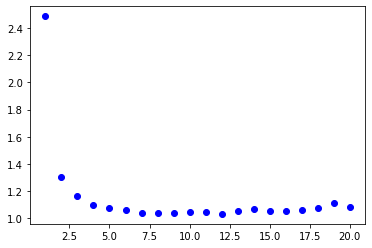

In [95]:
#Create plots
history_dict3 = history3.history
acc_values3 = history_dict3['accuracy']
val_acc_values3 = history_dict3['val_accuracy']
val_loss3 = history_dict2['loss']
val_loss_values3 = history_dict3['val_loss']

epochs3 = range(1, len(val_loss3) + 1)

#Plot for loss
plt.plot(epochs3, val_loss3, 'bo', label='Training loss')
plt.plot(epochs3, val_loss_values3, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

ValueError: x and y must have same first dimension, but have shapes (20,) and (200,)

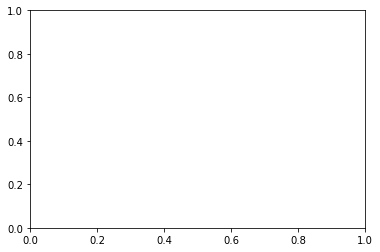

In [96]:
#Plot for Accuracy
plt.plot(epochs3, acc_values3, 'bo', label='Training Accuracy')
plt.plot(epochs3, val_acc_values3, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Assignment 6.3

```
Load the ResNet50 model. Perform image classification on five to ten images of your choice. They can be personal images or publically available images. Include the images in dsc650/assignments/assignment06/images/. Save the predictions dsc650/assignments/assignment06/results/predictions/resnet50 directory. If you are using JupyterHub, you can include those plots in your Jupyter notebook.
```

In [31]:
#load libraries
import os
from pathlib import Path

#load ResNet50 libraries
import numpy as np

from keras.preprocessing.image import img_to_array
from keras.applications.resnet50 import preprocess_input
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt

In [32]:
#set current directory and create images directory
current_dir = Path(os.getcwd()).absolute()
images_dir = current_dir.joinpath('images')
images_dir.mkdir(parents=True, exist_ok = True)

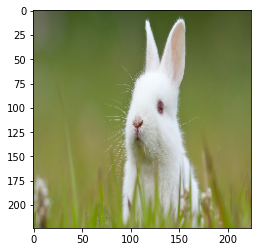

In [71]:
#Used article "Simple Image Classification with ResNet-50" from Medium
#I know I can loop this, but just having trouble getting it to work
#Load image1 and set target to 224, 224 since that is the format ResNet50 needs
img1 = image.load_img('images/bunny.jpg', target_size = (224, 224))
#show image
plt.imshow(img1)

In [72]:
#turn into a numpy array
img1 = image.img_to_array(img1)
#insert new axis that will appear at the axis position in expanded array shape
img1 = np.expand_dims(img1, axis = 0)
#Preprocessing the numpy array encoding a batch of images
img1 = preprocess_input(img1)
#instantiating the ResNet50 model
model = ResNet50(weights = 'imagenet')
#predicting on the model and printing the result
preds1 = model.predict(img1)
print('Predicted:', decode_predictions(preds1, top = 1)[0])

Predicted: [('n02326432', 'hare', 0.5823781)]


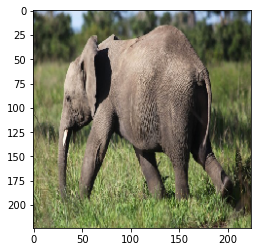

In [73]:
#Load image2 and set target to 224, 224 since that is the format ResNet50 needs
img2 = image.load_img('images/elephant.jpg', target_size = (224, 224))
#show image
plt.imshow(img2)

In [74]:
#turn into a numpy array
img2 = image.img_to_array(img2)
#insert new axis that will appear at the axis position in expanded array shape
img2 = np.expand_dims(img2, axis = 0)
#Preprocessing the numpy array encoding a batch of images
img2 = preprocess_input(img2)
#instantiating the ResNet50 model
model2 = ResNet50(weights = 'imagenet')
#predicting on the model and printing the result
preds2 = model.predict(img2)
print('Predicted:', decode_predictions(preds2, top = 1)[0])

Predicted: [('n01871265', 'tusker', 0.45374754)]


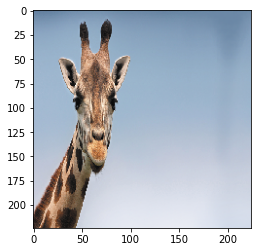

In [75]:
#Load image3 and set target to 224, 224 since that is the format ResNet50 needs
img3 = image.load_img('images/giraffe.png', target_size = (224, 224))
#show image
plt.imshow(img3)

In [76]:
#turn into a numpy array
img3 = image.img_to_array(img3)
#insert new axis that will appear at the axis position in expanded array shape
img3 = np.expand_dims(img3, axis = 0)
#Preprocessing the numpy array encoding a batch of images
img3 = preprocess_input(img3)
#instantiating the ResNet50 model
model3 = ResNet50(weights = 'imagenet')
#predicting on the model and printing the result
preds3 = model.predict(img3)
print('Predicted:', decode_predictions(preds3, top = 1)[0])

Predicted: [('n02417914', 'ibex', 0.36325175)]


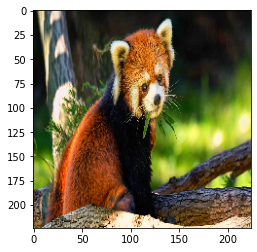

In [77]:
#Load image4 and set target to 224, 224 since that is the format ResNet50 needs
img4 = image.load_img('images/red_panda.png', target_size = (224, 224))
#show image
plt.imshow(img4)

In [78]:
#turn into a numpy array
img4 = image.img_to_array(img4)
#insert new axis that will appear at the axis position in expanded array shape
img4 = np.expand_dims(img4, axis = 0)
#Preprocessing the numpy array encoding a batch of images
img4 = preprocess_input(img4)
#instantiating the ResNet50 model
model4 = ResNet50(weights = 'imagenet')
#predicting on the model and printing the result
preds4 = model.predict(img4)
print('Predicted:', decode_predictions(preds4, top = 1)[0])

Predicted: [('n02509815', 'lesser_panda', 0.977285)]


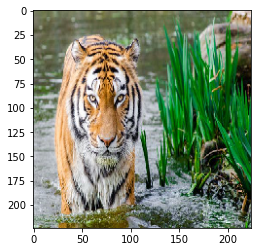

In [79]:
#Load image5 and set target to 224, 224 since that is the format ResNet50 needs
img5 = image.load_img('images/tiger.jpeg', target_size = (224, 224))
#show image
plt.imshow(img5)

In [80]:
#turn into a numpy array
img5 = image.img_to_array(img5)
#insert new axis that will appear at the axis position in expanded array shape
img5 = np.expand_dims(img5, axis = 0)
#Preprocessing the numpy array encoding a batch of images
img5 = preprocess_input(img5)
#instantiating the ResNet50 model
model5 = ResNet50(weights = 'imagenet')
#predicting on the model and printing the result
preds5 = model.predict(img5)
print('Predicted:', decode_predictions(preds5, top = 1)[0])

Predicted: [('n02129604', 'tiger', 0.7966444)]
